## Functions

$f(x)=x²$

In [2]:
f(x) = x*x

In [3]:
f(2)

4

### Parentheses are optional

In [4]:
f 2

4

In [5]:
square = f

In [6]:
square 2 

4

### Function with multiple arguments

In [7]:
plus x y = x+y

In [8]:
plus 2 3

5

In [9]:
square plus 2 3

Non type-variable argument in the constraint: Num (a -> a -> a)
(Use FlexibleContexts to permit this)
When checking that `it' has the inferred type
  it :: forall a. (Num a, Num (a -> a -> a)) => a

In [10]:
square (plus 2 3)

25

### Function as argument

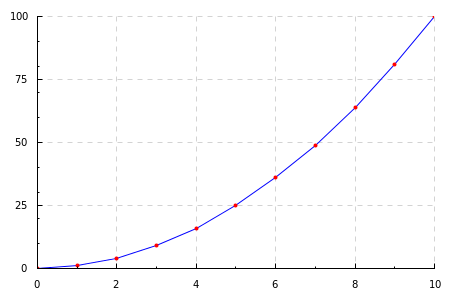

In [11]:
plot square

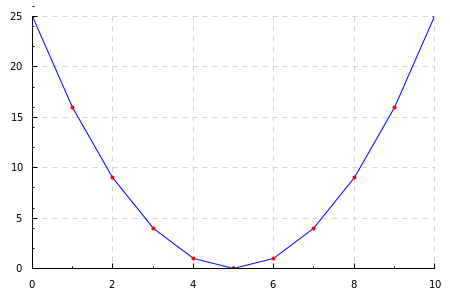

In [12]:
plot ( \x -> square (x - 5) )

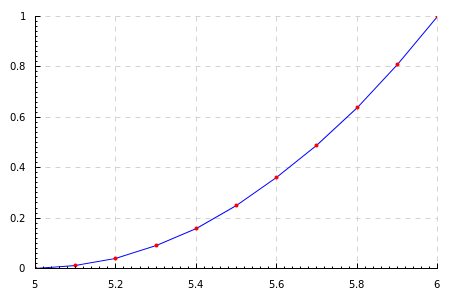

In [126]:
plotr ( \x -> square (x - 5) ) 5 0.1 6.0

In [14]:
import GHC.Float (sin)
sin 1.57

0.9999996829318346

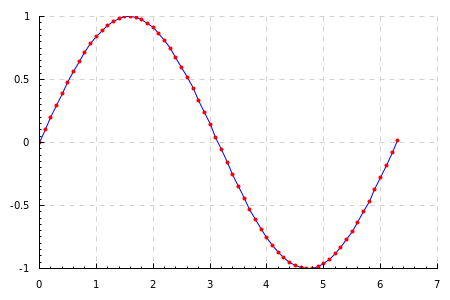

In [15]:
plotr sin 0 0.1 6.28

In [16]:
twice f x = f (f x) 

In [17]:
twice square 3

81

### A function can return a function

In [18]:
compose f g = \x -> f(g(x))

In [19]:
ss = compose sin square

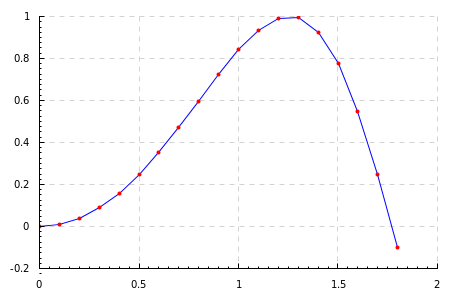

In [20]:
plotr ss 0 0.1 1.8

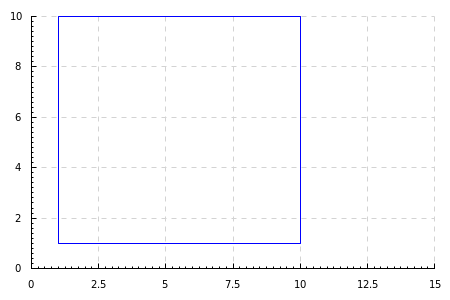

In [21]:
draw [[(1,1), (1,10), (10,10), (10,1), (1,1)] ]

### Functions can be partial
This is called _currying_

In [22]:
power4 = twice square

power4 2

16

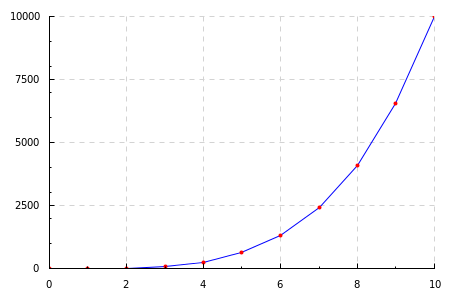

In [23]:
plot (twice square)

In [24]:
inc = plus 1

In [25]:
inc 4

5

In [26]:
(plus 1) 4

5

In [27]:
:t square

square :: forall a. Num a => a -> a

In [28]:
:t plus

plus :: forall a. Num a => a -> a -> a

Infix notation

In [29]:
1 `plus` 2 

3

In [30]:
(1 `plus`) 2

3

###  Operators are functions

In [31]:
(§) x y = (square x) `plus` y

In [32]:
2 § 2 § 4

40

In [33]:
($) = compose

In [34]:
ps = square $ inc

$ps(x)=(x+1)²$

In [35]:
ps 4

25

$diff(x,y) = x -y$

In [36]:
diff x y = x-y

In [37]:
diff 7 5

2

$rdiff(x,y) = y -x$

$flip(diff) = rdiff$

In [38]:
flip f x y = f y x

In [39]:
rdiff = flip diff

In [40]:
rdiff 7 5

-2

In [41]:
andThen = flip compose

In [42]:
ps = andThen inc square

In [43]:
ps 4

25

In [44]:
ps = inc `andThen` square

In [45]:
ps 4

25

In [46]:
(.) = andThen

In [47]:
(inc . square) 4

25

In [48]:
apply f x = f x

In [49]:
rapply = flip apply

In [50]:
rapply 3 square

9

In [51]:
(>>) = rapply

In [52]:
4 >> square

16

In [53]:
4 >> (inc . square)

25

In [54]:
4 >> inc >> square

25

In [55]:
(>>) x f = f x

In [56]:
4 >> inc >> square

25

### Constants are functions without parameters

In [57]:
a = 2

In [58]:
a

2

In [59]:
:t a

a :: forall a. Num a => a

In [60]:
a 3

Non type-variable argument in the constraint: Num (a -> t)
(Use FlexibleContexts to permit this)
When checking that `it' has the inferred type
  it :: forall a t. (Num a, Num (a -> t)) => t

### Pattern matching

In [61]:
guess 5 = "yes!"

In [62]:
guess 3

<interactive>:1:1-16: Non-exhaustive patterns in function guess

In [63]:
guess 5

"yes!"

In [64]:
guess 4 = "almost"

In [65]:
guess 4

"almost"

In [66]:
guess 5

<interactive>:1:1-18: Non-exhaustive patterns in function guess

In [67]:
guess 4 = "almost"
guess 5 = "yes!"
guess 6 = "almost"

In [68]:
guess 6

"almost"

In [69]:
guess 4 = "almost"
guess 5 = "yes!"
guess 6 = "almost"
guess x = "no!"

### Recursive function

In [70]:
fac 0 = 1
fac x = x*fac(x-1)

In [71]:
fac 4

24

In [72]:
fib 0 = 0
fib x = x+fib(x-1)

In [73]:
fib 5

15

$fac(x) = repeat(*, 1, x)$

$fib(x) = repeat(+, 0, x)$

In [74]:
repeat f p 0 = p
repeat f p x = f (repeat f p (x-1)) x

In [75]:
fib = repeat plus 0

In [76]:
fib 5

15

In [77]:
fac = repeat (*) 1

In [78]:
fac 4

24

In [79]:
:t repeat

repeat :: forall a t. (Eq a, Num a) => (t -> a -> t) -> t -> a -> t

In [80]:
:t compose

compose :: forall t t1 t2. (t1 -> t) -> (t2 -> t1) -> t2 -> t

In [81]:
for 0 f x = x
for n f x = f (for (n-1) f x)

In [82]:
for 4 inc 0

4

## Data types

In [83]:
data Box x c = Attach x c

In [84]:
context (Attach x c) = c

In [85]:
b = Attach 3 4

In [86]:
context b

4

In [87]:
data Box x c = Attach x c | Only x

In [88]:
data Void = Nothing deriving IHaskellPrelude.Show

In [89]:
context (Attach x c) = c
context (Only x) = Nothing

In [90]:
context (Only 4)

Nothing

### Collections

In [91]:
data List a = L a (List a) | Empty deriving IHaskellPrelude.Show

In [92]:
l = L 1 (L 2 (L 3 Empty))

In [93]:
l

L 1 (L 2 (L 3 Empty))

In [94]:
head Empty = Nothing
head (L h t) = h

In [95]:
head l

No instance for (Num Void) arising from a use of `l'
In the first argument of `head', namely `l'
In the expression: head l
In an equation for `it': it = head l

In [96]:
:t head

head :: List Void -> Void

In [97]:
data Maybe a = Just a | Nothing deriving IHaskellPrelude.Show

In [98]:
head Empty = Nothing
head (L h t) = Just h

In [99]:
head l

Just 1

In [100]:
tail Empty = Nothing
tail (L h t) = Just t

In [101]:
tail l

Just (L 2 (L 3 Empty))

In [102]:
tail (L 23 Empty)

Just Empty

In [103]:
second x = head (tail x)

Couldn't match expected type `List a' with actual type `Maybe (List t)'
Relevant bindings include
  x :: List t (bound at <interactive>:1:8)
  second :: List t -> Maybe a (bound at <interactive>:1:1)
In the first argument of `head', namely `(tail x)'
In the expression: head (tail x)

In [104]:
:t tail

tail :: forall t. List t -> Maybe (List t)

In [105]:
:t head

head :: forall a. List a -> Maybe a

In [106]:
mhead Nothing = Nothing
mhead (Just x) = head x

In [107]:
mtail Nothing = Nothing
mtail (Just x) = tail x

In [108]:
mtail (Just (L 1 Empty))

Just Empty

In [109]:
second x = mhead (mtail (Just x))

In [110]:
second l

Just 2

In [111]:
second Empty

Nothing

Well, this is not practical to define all these "m" functions, no?

In [112]:
mbind f Nothing = Nothing
mbind f (Just x) = f x

In [113]:
second x = (mbind head) ((mbind tail ) (Just x))

In [114]:
second l

Just 2

In [115]:
:t mbind

mbind :: forall t a. (t -> Maybe a) -> Maybe t -> Maybe a

In [116]:
:t (+)

(+) :: forall a. Num a => a -> a -> a

In [117]:
second = (mbind head) $ (mbind tail ) $ Just

In [118]:
second l

Just 2

In [119]:
mcompose f g = (mbind f) $ (mbind g) $ Just

In [120]:
second = mcompose head tail

In [121]:
second l

Just 2

In [122]:
reduce f p Empty = p
reduce f p (L h t) = f h (reduce f p t)

In [123]:
sum = reduce plus 0

In [124]:
sum l

6